<a href="https://colab.research.google.com/github/Musarrat06/TechnoHacks-Internship/blob/main/Employee_Turnover_Prediction_(Supervised_Classification_Task).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Employee Turnover Prediction:**

### **Introduction:**
Employee turnover prediction is a crucial aspect of human resource management as it helps organizations understand and mitigate the potential loss of valuable employees. In this project, three models has been dveloped to predict employye turnover (SVM, Naiv Bayes, Logistic Regression). We can also try any tree based model to predict the outcome. The goal of this project is to utilize machine learning techniques to identify patterns and factors that contribute to employee attrition, ultimately aiding in creating strategies to retain talented individuals within the organization.

### **Objective:**
The main objective of employee turnover prediction is to identify and anticipate employees who are likely to leave an organization voluntarily. This predictive analysis helps companies take proactive measures to mitigate turnover, retain valuable talent, and maintain a stable and productive workforce. By identifying factors that contribute to attrition and predicting when it might occur, organizations can implement targeted strategies such as improved working conditions, career development opportunities, or competitive compensation to reduce turnover rates.

- ### **Performing EDA:**

In [ ]:
# importing Liabraries.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load & read csv file.

HR_Analytics = pd.read_csv("HR_Analytics.csv")

In [ ]:
HR_Analytics.head()   # shows fir 5 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
HR_Analytics.tail()  # shows last 5 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [ ]:
HR_Analytics.shape    # shows rows and columns

(1470, 35)

- The dataset has 1470 rows and 35 columns.

In [ ]:
HR_Analytics.info()    # showing information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
HR_Analytics.columns   # Total columns present in the dataset

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### **Checking for Null Values:**

In [ ]:
HR_Analytics.isnull().sum()   # calculate null values if any.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- It has no null values.

#### **Chekcing for Duplicate values:**

In [ ]:
HR_Analytics.duplicated().sum()

0

- There is no duplicate value in the dataset.

In [ ]:
HR_Analytics.nunique()  # shows the nummber of unique items in each column.

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
HR_Analytics.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


- Let's check unique items in each column(category). With the help of this we can find if there is any blank space or other object like dot, dash, question mark, are present or not.

In [ ]:
HR_Analytics['Attrition'].unique()     # shows the unique values present in the column

array(['Yes', 'No'], dtype=object)

In [ ]:
HR_Analytics['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
HR_Analytics['MaritalStatus'].unique()   # shows the unique values present in the column

array(['Single', 'Married', 'Divorced'], dtype=object)

In [ ]:
HR_Analytics['Over18'].unique()     # shows the unique values present in the column

array(['Y'], dtype=object)

In [ ]:
HR_Analytics['OverTime'].unique()          # shows the unique values present in the column

array(['Yes', 'No'], dtype=object)

In [ ]:
HR_Analytics['Department'].unique()         # shows the unique values present in the column

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [ ]:
HR_Analytics['EducationField'].unique()        # shows the unique values present in the column

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [ ]:
HR_Analytics['JobRole'].unique()      # shows the unique values present in the column

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [ ]:
HR_Analytics['Age'].unique()      # shows the unique values present in the column

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [ ]:
HR_Analytics['Age'].min()   # minimum value present in Age column

18

In [ ]:
HR_Analytics['Age'].max()   # maximum value present in Age column

60

- With the help of min() & max() - function we can see that there is no outlier is present in Age column.

### **Univariate Analysis:**

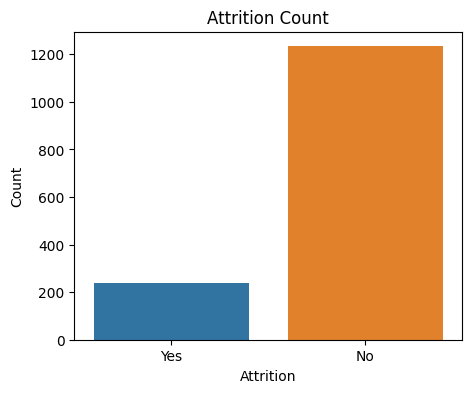

In [ ]:
# Countplot of Attrition
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.countplot(data=HR_Analytics, x='Attrition')
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()


- The count of employees with Attrition: Yes is lower compared to those with Attrition: No, indicating that more employees have stayed in the company.


### **Bi-variate Analysis:**

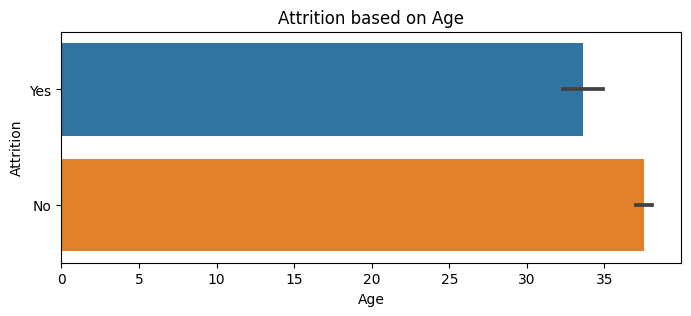

In [ ]:
# Bar plot of Attrition based on Age
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 3))
sns.barplot(data=HR_Analytics, x='Age', y='Attrition')
plt.title('Attrition based on Age')
plt.xlabel('Age')
plt.ylabel('Attrition')
plt.show()

- This suggests that employees around the age of 34 tend to have a higher attrition rate (i.e., they are more likely to leave the company), while employees above the age of 35 are less likely to leave. The visualization indicates a potential age-related pattern in employee attrition, with a shift occurring around the age of 35.

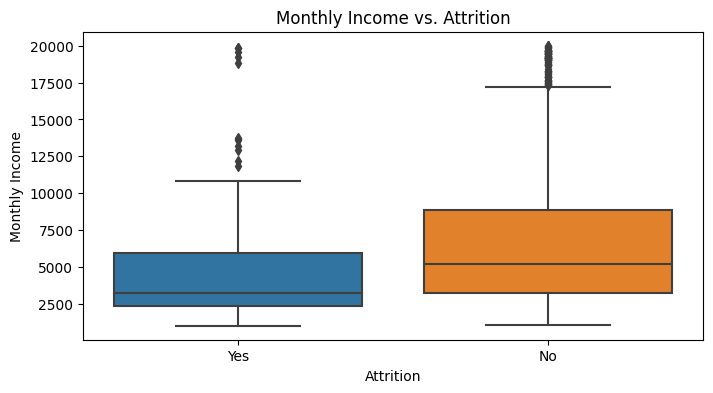

In [ ]:
# Box plot of MonthlyIncome vs. Attrition

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(data=HR_Analytics, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()


- This suggests that some employees with higher monthly incomes in the specified range have still chosen to leave the company. These outliers could indicate that factors other than income might contribute to their decision to leave.

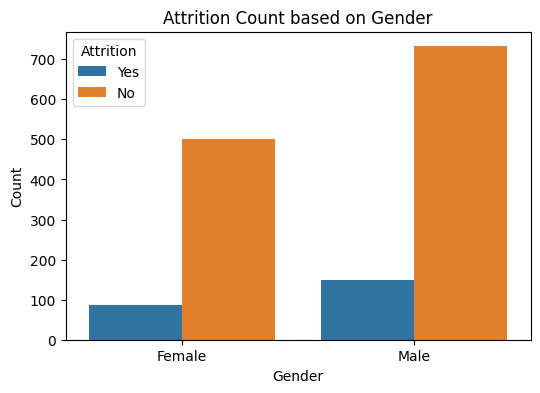

In [ ]:
# Countplot of Attrition based on Gender
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=HR_Analytics, x='Gender', hue='Attrition')
plt.title('Attrition Count based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

- We can see that there may be some underlying factors that are causing more males to leave the company than females. These factors could include discrimination, lack of opportunities, or a poor work-life balance.

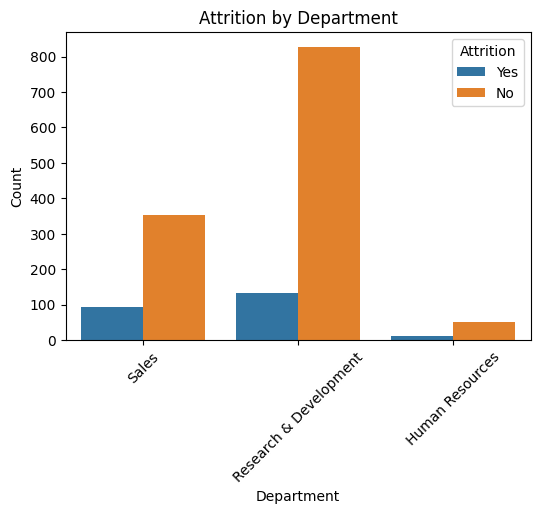

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=HR_Analytics, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- It is clear from the above visual that the Research & Development department and Sales dpartment has the highest attrition rate as compared to the Human Resource. To reduce these attrition the company can provide more training and development to the employees of Sales department and improve the work-life balance for the employees of Research & Development department.

<Figure size 1600x1200 with 0 Axes>

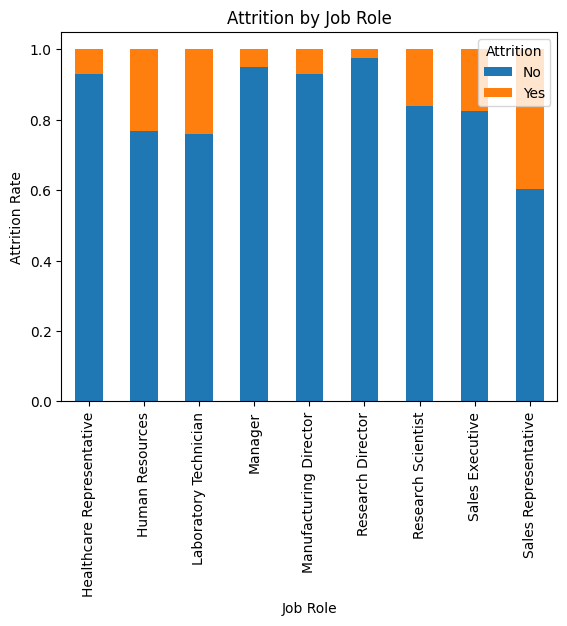

In [ ]:
# Calculate attrition rate for each job role
attrition_by_job_role = HR_Analytics.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack()

# Plot the bar plot
plt.figure(figsize=(4, 3), dpi=400)
attrition_by_job_role.plot(kind='bar', stacked=True)
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=90)
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

- If we analyze the attrition according to job role, then the Sales Representative has the highest attrition rate among all.

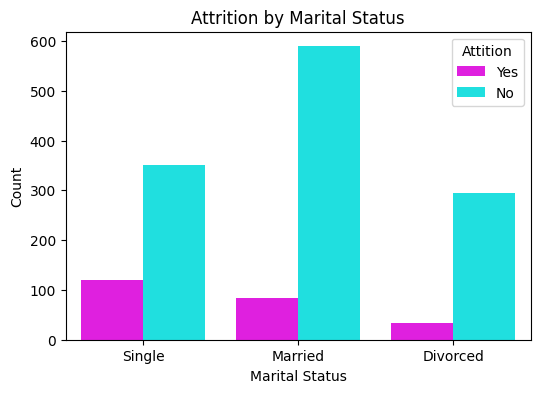

In [ ]:
plt.figure(figsize=(6, 4))

custome_palette = {'No':'cyan', 'Yes':'magenta'}

sns.countplot(data=HR_Analytics, x='MaritalStatus', hue='Attrition', palette=custome_palette)
plt.title('Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Attition', loc='upper right')
plt.show()

- This suggests that single employees are more likely to leave the company than married or divorced employees.
- There are a few possible reasons for this. Single employees may be more likely to be looking for new opportunities.

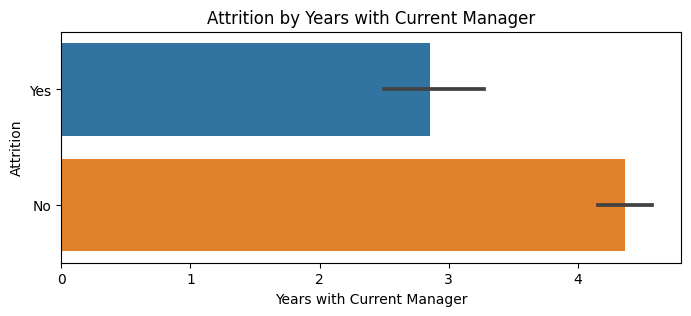

In [ ]:
plt.figure(figsize=(8, 3))
sns.barplot(data=HR_Analytics, x='YearsWithCurrManager', y='Attrition')
plt.title('Attrition by Years with Current Manager')
plt.xlabel('Years with Current Manager')
plt.ylabel('Attrition')
plt.show()

We can observe here that, employees are more likely to leave the company after 2 or 3 years with their current manager. There are a few possible reasons for this.

- Employees may be looking for a new challenge or a new opportunity after a few years with the same manager.
- Employees may be unhappy with their current manager or with the company culture.
- Employees may be promoted or transferred to a new role, which may require them to leave their current manager.

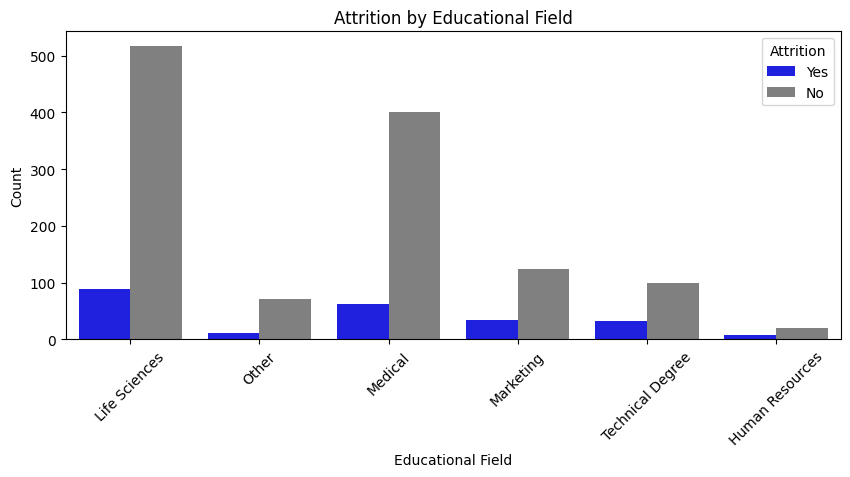

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

custome_palette = {'No':'gray', 'Yes':'blue'}

plt.figure(figsize=(10, 4))
sns.countplot(data=HR_Analytics, x='EducationField', hue='Attrition', palette=custome_palette)
plt.title('Attrition by Educational Field')
plt.xlabel('Educational Field')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=45)
plt.show()

- Employees with educational field like Life Science & Medical may be more likely to be dissatisfied with their current role or company or it may be possible that these employees are more likely to be looking for a higher salary or better benefits.


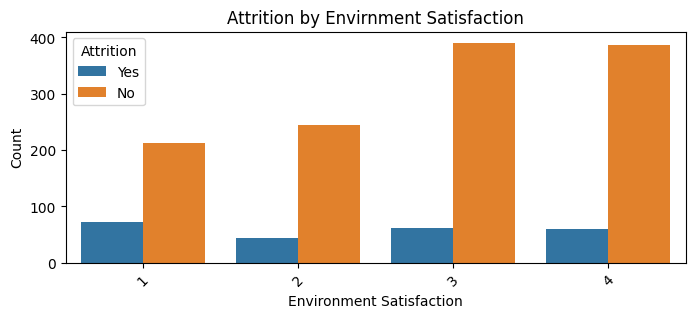

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 3))
sns.countplot(data=HR_Analytics, x='EnvironmentSatisfaction', hue='Attrition')
plt.title('Attrition by Envirnment Satisfaction')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- The attrition rate is lowest for employees who are very satisfied with their environment.
- The attrition rate increases for employees who are dissatisfied or neutral about their environment.
- The attrition rate is highest for employees who are very dissatisfied with their environment.

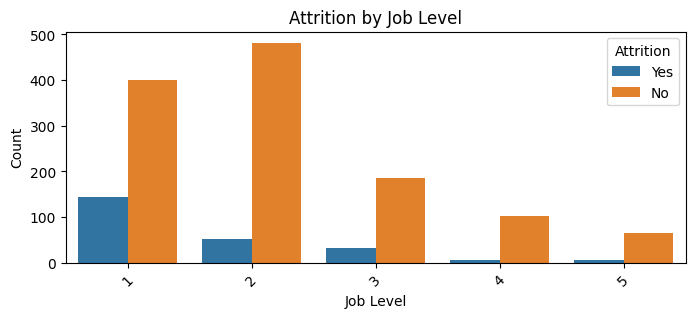

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 3))
sns.countplot(data=HR_Analytics, x='JobLevel', hue='Attrition')
plt.title('Attrition by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- The employees with lowest level of job are more likely to leave the company. It can be possible that they are getting good opportunities from other companies. Increase in job level reduces the attrition rate in the company.

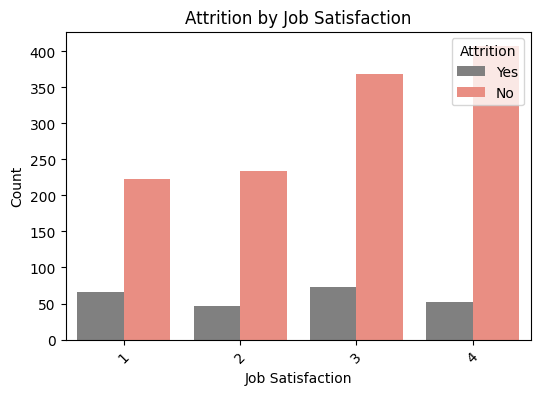

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

custome_palette = {'No':'salmon', 'Yes':'gray'}

plt.figure(figsize=(6, 4))
sns.countplot(data=HR_Analytics, x='JobSatisfaction', hue='Attrition', palette=custome_palette)
plt.title('Attrition by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=45)
plt.show()

- We can see here there is no relation between the job satisfaction and attrition rate. As the employees with good satisfaction also more likely to leave the company, may be other factors are having influence on attrition rate.

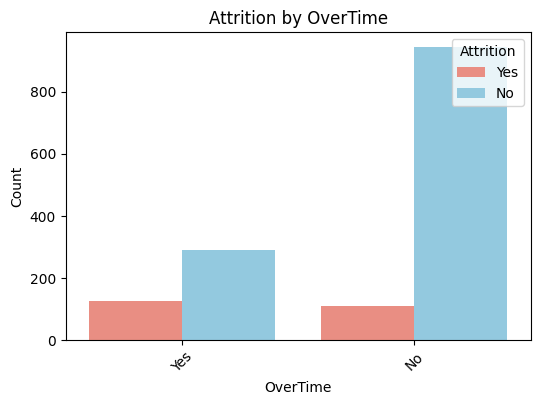

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette
custom_palette = {'No': 'skyblue', 'Yes': 'salmon'}

plt.figure(figsize=(6, 4))
sns.countplot(data=HR_Analytics, x='OverTime', hue='Attrition', palette=custom_palette)
plt.title('Attrition by OverTime')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.show()

- From this graph we can identify that the employees who are doing overtime and those employees who are not doing any overtime, in both categories the attrition rate is nearly the same.

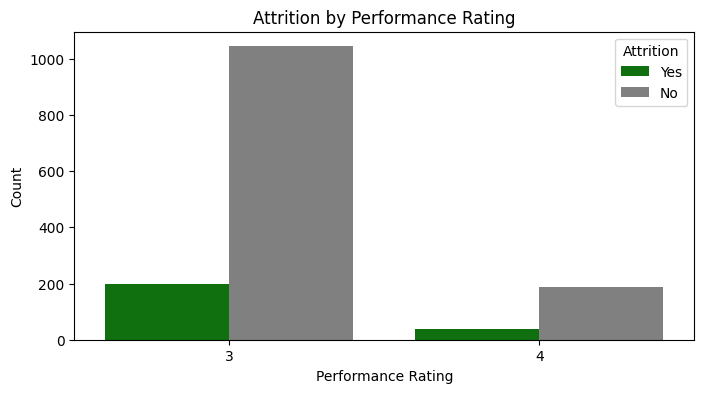

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = {'No': 'gray', 'Yes': 'green'}

plt.figure(figsize=(8, 4))
sns.countplot(data=HR_Analytics, x='PerformanceRating', hue='Attrition', palette=custom_palette)
plt.title('Attrition by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

- Employees with lower performance rating are most likely to leave the company, may be they are not satisfied with the ratings and increment.
- The attrition rate is low in employees with good perforance. They might be getting good opportunities from other companies based on their performance.

### **Skewness**

In [ ]:
HR_Analytics.skew()

<ipython-input-44-35eb9cf7293a>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  HR_Analytics.skew()


Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

**Age (0.413286):** Slightly right-skewed, indicating a slightly larger number of younger employees.

**DailyRate (-0.003519):** Almost symmetric, with a negligible skewness.

**DistanceFromHome (0.958118):** Moderately right-skewed, suggesting a concentration of employees living closer to work.

**Education (-0.289681):** Slightly left-skewed, indicating a slightly larger number of employees with higher education.

**EmployeeNumber (0.016574):** Almost symmetric, with a negligible skewness.

**EnvironmentSatisfaction (-0.321654):** Slightly left-skewed, indicating a slightly larger number of employees with higher satisfaction.

**HourlyRate (-0.032311):** Almost symmetric, with a negligible skewness.

**JobInvolvement (-0.498419):** Slightly left-skewed, indicating a slightly larger number of employees with higher job involvement.

**JobLevel (1.025401):** Right-skewed, suggesting a concentration of employees at lower job levels.

**JobSatisfaction (-0.329672):** Slightly left-skewed, indicating a slightly larger number of employees with higher job satisfaction.

**MonthlyIncome (1.369817):** Right-skewed, indicating a concentration of employees at lower income levels.

**MonthlyRate (0.018578):** Almost symmetric, with a negligible skewness.

**NumCompaniesWorked (1.026471):** Right-skewed, suggesting a concentration of employees who have worked for fewer companies.

**PercentSalaryHike (0.821128):** Right-skewed, indicating a concentration of employees with lower percentage salary hikes.

**PerformanceRating (1.921883):** Right-skewed, suggesting a concentration of employees with lower performance ratings.

**RelationshipSatisfaction (-0.302828):** Slightly left-skewed, indicating a slightly larger number of employees with higher relationship satisfaction.

**StockOptionLevel (0.968980):** Right-skewed, suggesting a concentration of employees with lower stock option levels.

**TotalWorkingYears (1.117172):** Right-skewed, indicating a concentration of employees with fewer total working years.

**TrainingTimesLastYear (0.553124):** Right-skewed, indicating a concentration of employees with lower training times last year.

**WorkLifeBalance (-0.552480):** Left-skewed, indicating a concentration of employees with higher work-life balance.

**YearsAtCompany (1.764529):** Right-skewed, suggesting a concentration of employees with shorter tenures at the company.

**YearsInCurrentRole (0.917363):** Right-skewed, indicating a concentration of employees with shorter durations in their current roles.

**YearsSinceLastPromotion (1.984290):** Right-skewed, suggesting a concentration of employees who haven't had promotions recently.

**YearsWithCurrManager (0.833451):** Right-skewed, indicating a concentration of employees with shorter durations working with their current managers.

### **Identifying Outliers:**

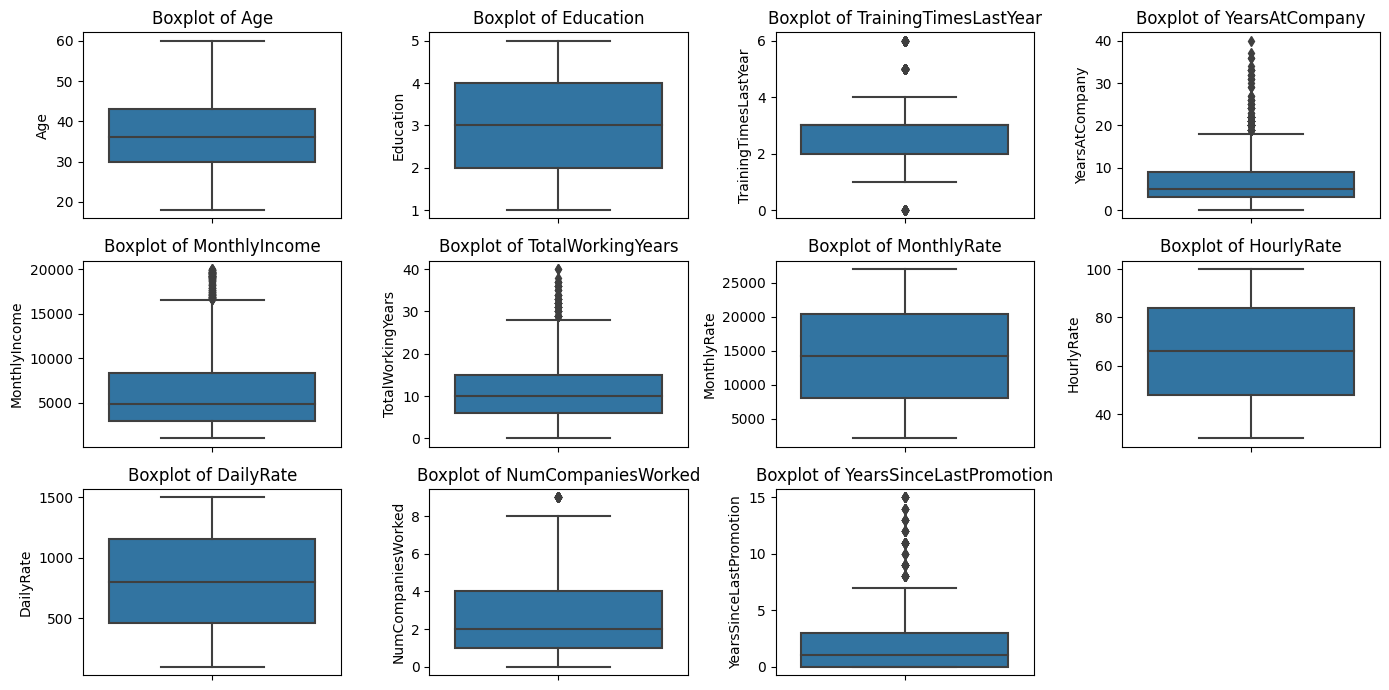

In [ ]:
#  Choose the numerical columns for which you want to create boxplots
numerical_columns = ['Age', 'Education', 'TrainingTimesLastYear', 'YearsAtCompany', 'MonthlyIncome', 'TotalWorkingYears',
                     'MonthlyRate', 'HourlyRate', 'DailyRate', 'NumCompaniesWorked', 'YearsSinceLastPromotion']

# Set up subplots
plt.figure(figsize=(14, 7))

# Create boxplots for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)  # Adjust the subplot layout as needed
    sns.boxplot(data=HR_Analytics, y=column)
    plt.title(f'Boxplot of {column}')

# Show the boxplots
plt.tight_layout()
plt.show()

**Capping the outliers:**

In [ ]:
Columns_with_outliers = ['TrainingTimesLastYear', 'YearsAtCompany', 'TotalWorkingYears',
                         'NumCompaniesWorked', 'YearsSinceLastPromotion']

def cap_outliers(df, columns_with_outliers):
    for column in columns_with_outliers:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers by setting values below the lower bound to the lower bound
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else x)

        # Cap outliers by setting values above the upper bound to the upper bound
        df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)

    return df
HR_Analytics = cap_outliers(HR_Analytics, Columns_with_outliers)

**visualizing boxplot after capping outliers:**

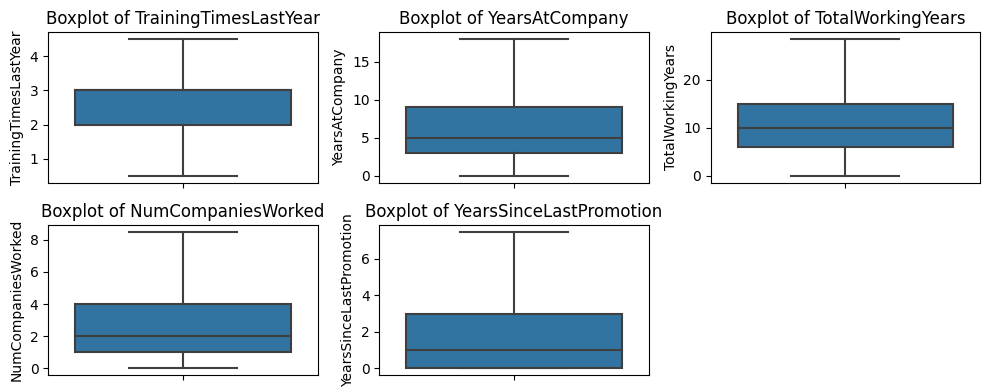

In [ ]:
#  Choose the numerical columns for which you want to create boxplots
numerical_columns = ['TrainingTimesLastYear', 'YearsAtCompany', 'TotalWorkingYears',
                     'NumCompaniesWorked', 'YearsSinceLastPromotion']

# Set up subplots
plt.figure(figsize=(10, 4))

# Create boxplots for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Adjust the subplot layout as needed
    sns.boxplot(data=HR_Analytics, y=column)
    plt.title(f'Boxplot of {column}')

# Show the boxplots
plt.tight_layout()
plt.show()

### **Discretization:**

In [ ]:
import pandas as pd
HR_Analytics = pd.read_csv('HR_Analytics.csv')

In [ ]:
# Bining Age column:

HR_Analytics['Age'] = pd.cut(HR_Analytics['Age'], bins = [18, 30, 40, 50, 60],
                             labels = ["Young Adults", "Mid Age Adults", "Late Age Adults", "Senior Adults"])

In [ ]:
HR_Analytics['Age']

0       Late Age Adults
1       Late Age Adults
2        Mid Age Adults
3        Mid Age Adults
4          Young Adults
             ...       
1465     Mid Age Adults
1466     Mid Age Adults
1467       Young Adults
1468    Late Age Adults
1469     Mid Age Adults
Name: Age, Length: 1470, dtype: category
Categories (4, object): ['Young Adults' < 'Mid Age Adults' < 'Late Age Adults' < 'Senior Adults']

In [ ]:
Employee_turnover = HR_Analytics.copy()

- **Let's first separate the target variable with other columns before encoding to prevent data leakage.**

In [ ]:
Independent = Employee_turnover.drop(columns=['Attrition'], axis=1)
Dependent = Employee_turnover['Attrition']

### **Encoding Categorical Variables:**

In [ ]:
# Ordinal encoding for Education column..

from sklearn.preprocessing import OrdinalEncoder

Or_enc = OrdinalEncoder()
Independent[["EducationField", "JobRole"]] = Or_enc.fit_transform(Independent[["EducationField", "JobRole"]])

In [ ]:
# Select categorical columns that need to be one-hot encoded
categorical_columns = ['BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 'Over18', 'OverTime']

# Perform one-hot encoding
pd.get_dummies(Independent, columns=categorical_columns, drop_first=True)


,Age,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,Late Age Adults,1102,1,2,1.0,1,1,2,94,3,...,0,5,0,1,0,1,0,0,1,1
1,Late Age Adults,279,8,1,1.0,1,2,3,61,2,...,1,7,1,0,1,0,1,1,0,0
2,Mid Age Adults,1373,2,2,4.0,1,4,4,92,2,...,0,0,0,1,1,0,1,0,1,1
3,Mid Age Adults,1392,3,4,1.0,1,5,4,56,3,...,3,0,1,0,1,0,0,1,0,1
4,Young Adults,591,2,1,3.0,1,7,1,40,3,...,2,2,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Mid Age Adults,884,23,2,3.0,1,2061,3,41,4,...,0,3,1,0,1,0,1,1,0,0
1466,Mid Age Adults,613,6,1,3.0,1,2062,4,42,2,...,1,7,0,1,1,0,1,1,0,0
1467,Young Adults,155,4,3,1.0,1,2064,2,87,4,...,0,3,0,1,1,0,1,1,0,1
1468,Late Age Adults,1023,2,3,3.0,1,2065,4,63,2,...,0,8,1,0,0,1,1,1,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
categorical_columns = Independent.select_dtypes(include=['object','category']).columns
for column in categorical_columns:
    Independent[column] = label_encoder.fit_transform(Independent[column])


In [ ]:
# applying label encoder to target variable:

Dependent = label_encoder.fit_transform(Dependent)
Dependent

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
Independent.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,2,1102,2,1,2,1.0,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,0,1,279,1,8,1,1.0,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,1,2,1373,1,2,2,4.0,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,1,1,1392,1,3,4,1.0,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,3,2,591,1,2,1,3.0,1,7,1,...,4,80,1,6,3,3,2,2,2,2


### **Correlation Analysis:**

In [ ]:
dependent = pd.DataFrame(Dependent)   # converting series object into dataframe to analyze the correlation(spearman).

In [ ]:
data = pd.concat([Independent, dependent], axis=1)   # concatenating both Independent and dependent

In [ ]:
corr = data.corr(method='spearman')    # calcualting correlation value

<Axes: >

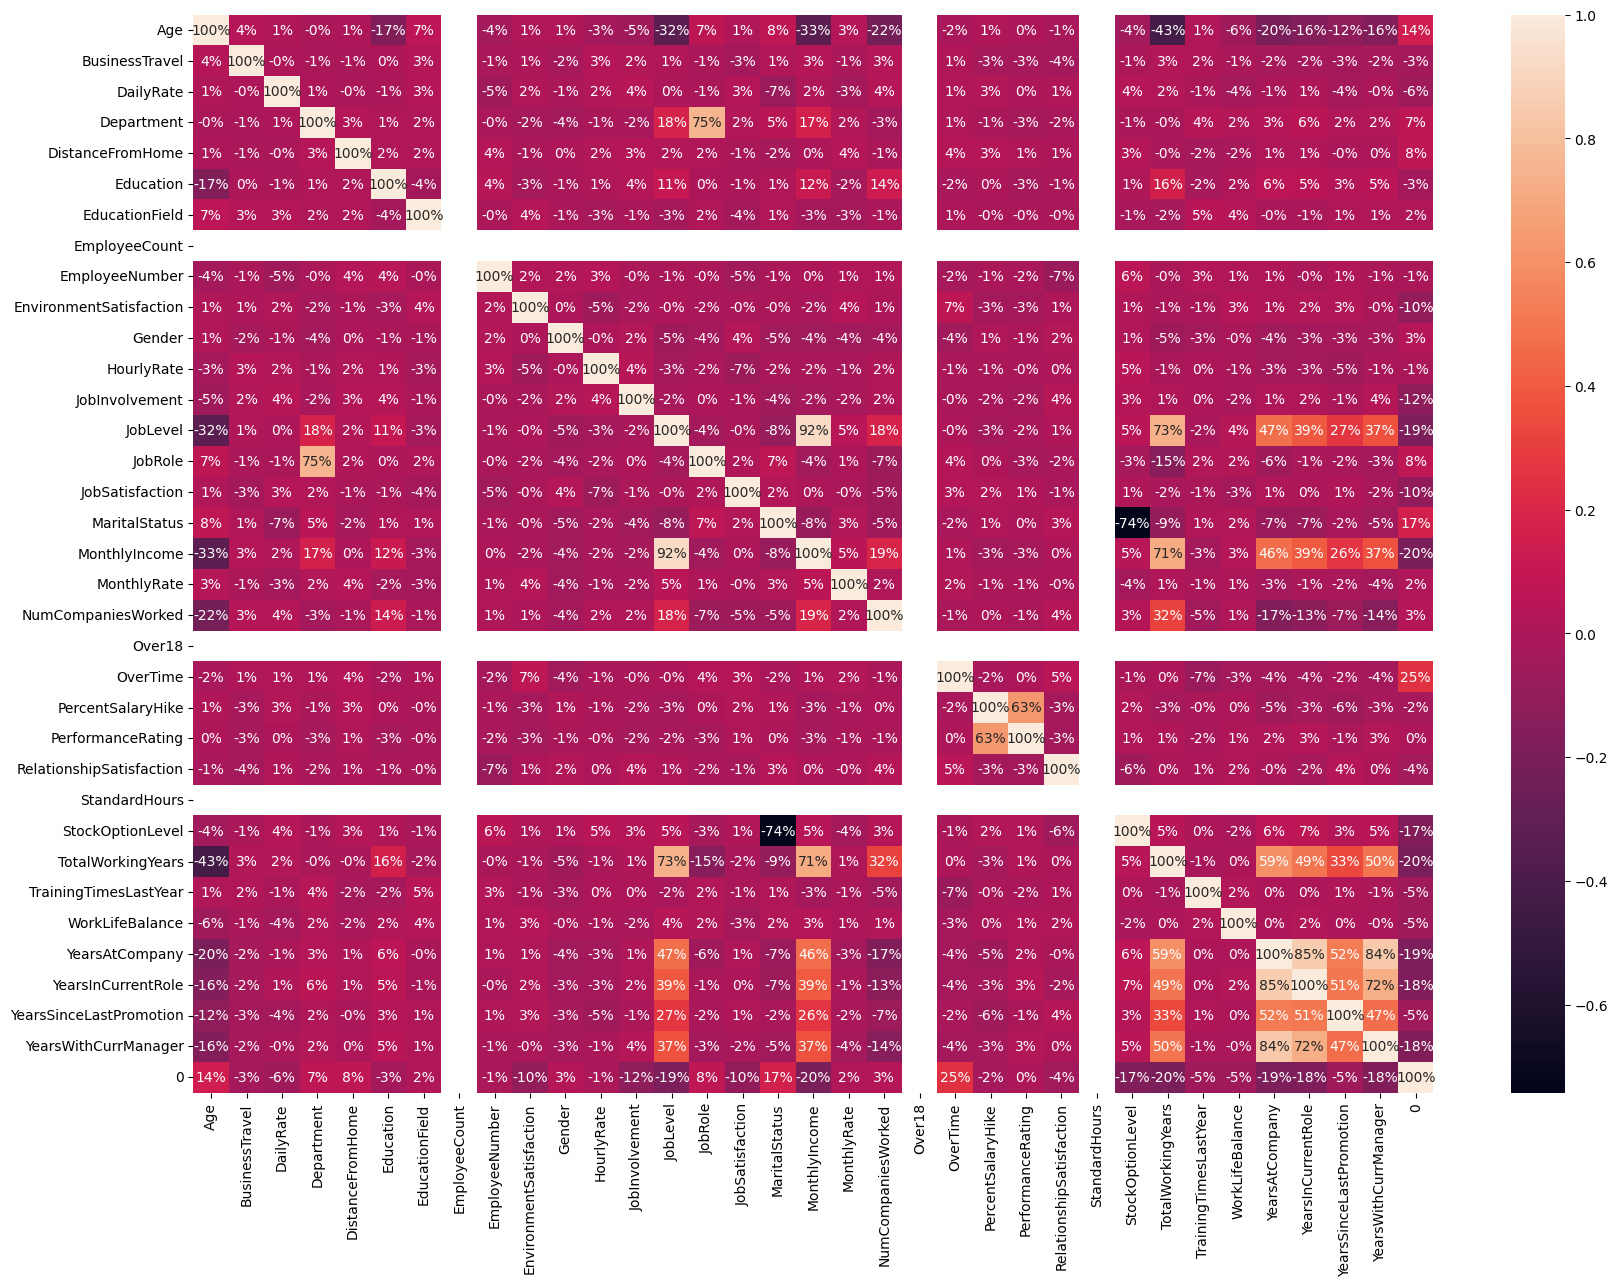

In [ ]:
# visualizing the correlation with the help of heatmap:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,14))
sns.heatmap(corr, annot=True, fmt='.0%')

- Age, MaritalStatus, JobRole, EducationField, etc. these variables are having position correlation with the target variable i.e Atrrition.
- We can also see weak positive correlation in Gender, DistanceFromHome, etc. with the target variable.
- JobLevel, MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion, Education, YearsInCurrentRole, YearsWithCurrentManager, OverTime, etc. are having strong negative correlation.


**Data Splitting:**

In [ ]:
X = Independent
y = Dependent

### **Feature Selection by using SelectKBest:**

In [ ]:
# applying SelectKBest class to extract best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
# print(featureScores.nlargest(10,'Score'))  #print 10 best features

Bestfeatures = featureScores.nlargest(10,'Score')
print(Bestfeatures)

                Features          Score
17         MonthlyIncome  127922.293694
18           MonthlyRate    1196.633553
2              DailyRate     956.580494
27     TotalWorkingYears     230.721618
30        YearsAtCompany     142.100054
31    YearsInCurrentRole     117.522596
33  YearsWithCurrManager     110.671534
21              OverTime      63.845067
4       DistanceFromHome      63.772142
8         EmployeeNumber      58.120326


- **MonthlyIncome:** This feature has the highest score, indicating that it is strongly correlated with the target variable and contributes significantly to predicting attrition.

- **MonthlyRate:** This feature also has a high score, suggesting that it plays a notable role in predicting attrition.

- **DailyRate:** While not as high as the top two, this feature still has a considerable score, implying that it contributes to the prediction task.

- **TotalWorkingYears:** This feature has a relatively high score, indicating that it has some influence on predicting attrition.

- **YearsAtCompany:** This feature has a moderate score, suggesting it has a moderate impact on predicting attrition.

- **YearsInCurrentRole:** Similarly, this feature also has a moderate score, implying that it contributes moderately to predicting attrition.

- **YearsWithCurrManager:** This feature has a relatively moderate score, indicating its moderate importance in predicting attrition.

- **Age:** This feature has a moderate score, suggesting that it is relevant to predicting attrition, but its importance might not be as high as some others.

- **OverTime:** This categorical feature has a moderate score, implying that it has an influence on predicting attrition.

- **DistanceFromHome:** This feature also has a moderate score, suggesting that it contributes moderately to predicting attrition.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [ ]:
(X_train.shape), (y_train.shape), (X_test.shape), (y_test.shape)

((1029, 34), (1029,), (441, 34), (441,))

In [ ]:
# Remove zero variance features
X_train = X_train.loc[:, X_train.apply(pd.Series.var) != 0]
X_test = X_test.loc[:, X_test.columns.isin(X_train.columns)]

In [ ]:
(X_train.shape), (y_train.shape), (X_test.shape), (y_test.shape)

((1029, 31), (1029,), (441, 31), (441,))

In [ ]:
# Create SelectKBest instance using ANOVA F-value as the scoring function
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=7)

# Fit and transform the selector on the training data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

### **Support Vector Machine:**

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_selected)
X_test = scaler.transform(X_test_selected)

svm = SVC(kernel='linear', probability=True)

svm.fit(X_train_selected, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# making prediction.
y_pred_train_svm = svm.predict(X_train_selected)

# calculating accuracy score & generating classification report.
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
report_train_svm = classification_report(y_train, y_pred_train_svm, zero_division=1)

print("SVM Accuracy Report on Train Dataset : {:.2f}%".format(accuracy_train_svm*100))
print("\nClassification Report : ", report_train_svm)

SVM Accuracy Report on Train Dataset : 85.62%

Classification Report :                precision    recall  f1-score   support

           0       0.87      0.97      0.92       853
           1       0.66      0.32      0.44       176

    accuracy                           0.86      1029
   macro avg       0.77      0.64      0.68      1029
weighted avg       0.84      0.86      0.84      1029



In [ ]:
y_pred_test_svm = svm.predict(X_test_selected)

accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
report_test_svm = classification_report(y_test, y_pred_test_svm, zero_division=1)

print("SVM Accuracy Score on Test Dataset : {:.2f}%".format(accuracy_test_svm*100))
print("\nClassffication Report on Test Dataset : ",report_test_svm)

SVM Accuracy Score on Test Dataset : 84.81%

Classffication Report on Test Dataset :                precision    recall  f1-score   support

           0       0.87      0.97      0.92       380
           1       0.33      0.10      0.15        61

    accuracy                           0.85       441
   macro avg       0.60      0.53      0.53       441
weighted avg       0.80      0.85      0.81       441



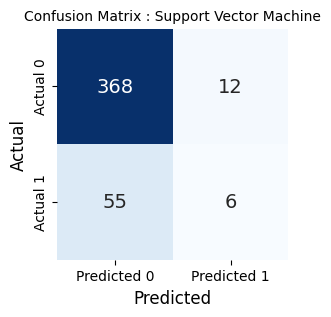

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_test are your true labels and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred_test_svm)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14}, square=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix : Support Vector Machine', fontsize=10)
plt.show()

### **Naive Bayes:**

In [ ]:
from sklearn.naive_bayes import GaussianNB

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_selected)
X_test = scaler.transform(X_test_selected)

gnb = GaussianNB()
gnb.fit(X_train_selected, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# making prediction
y_pred_train_gnb = gnb.predict(X_train_selected)

# calculating accuracy score & generating classificaion report.
accuracy_train_gnb = accuracy_score(y_train, y_pred_train_gnb)
report_train_gnb = classification_report(y_train, y_pred_train_gnb, zero_division=1)

print("Naive Bayes Accuracy Score on test  Data : {:.2f}%".format(accuracy_train_gnb*100))
print("\nClassification Report : ", report_train_gnb)


Naive Bayes Accuracy Score on test  Data : 79.79%

Classification Report :                precision    recall  f1-score   support

           0       0.90      0.85      0.87       853
           1       0.43      0.55      0.48       176

    accuracy                           0.80      1029
   macro avg       0.67      0.70      0.68      1029
weighted avg       0.82      0.80      0.81      1029



In [ ]:
# making prediction.
y_pred_test_gnb = gnb.predict(X_test_selected)

# calculating accuracy score and generating classification report.
accuracy_train_gnb = accuracy_score(y_test, y_pred_test_gnb)
report_train_gnb = classification_report(y_test, y_pred_test_gnb, zero_division=1)

print("Naive Bayes Accuracy Score on test  Data : {:.2f}%".format(accuracy_train_gnb*100))
print("\nClassification Report : ", report_train_gnb)


Naive Bayes Accuracy Score on test  Data : 79.59%

Classification Report :                precision    recall  f1-score   support

           0       0.89      0.87      0.88       380
           1       0.30      0.36      0.33        61

    accuracy                           0.80       441
   macro avg       0.60      0.61      0.60       441
weighted avg       0.81      0.80      0.80       441



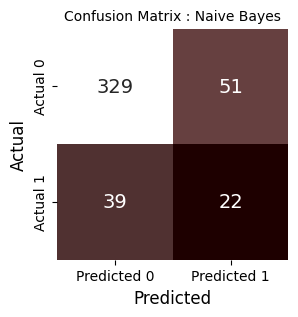

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_test are your true labels and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred_test_gnb)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink', cbar=False,
            annot_kws={"size": 14}, square=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix : Naive Bayes', fontsize=10)
plt.show()

### **Logistic Regression:**

In [ ]:
# Building Logistic Regression model.
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_selected)
X_test = scaler.transform(X_test_selected)

lg_model = LogisticRegression(max_iter=1000 )

lg_model.fit(X_train_selected, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# making predication.
y_pred_train_lg = lg_model.predict(X_train_selected)

# calculating accuracy no training data.
accuracy_train_lg = accuracy_score(y_train, y_pred_train_lg)
classification_rep_lg = classification_report(y_train, y_pred_train_lg)

print("Logistic Regression Accuracy Score on Training Data : ", accuracy_train_lg*100)
print("\nClassification Report : ", classification_rep_lg)

Logistic Regression Accuracy Score on Training Data :  85.03401360544217

Classification Report :                precision    recall  f1-score   support

           0       0.87      0.97      0.91       853
           1       0.64      0.29      0.40       176

    accuracy                           0.85      1029
   macro avg       0.75      0.63      0.66      1029
weighted avg       0.83      0.85      0.83      1029



In [ ]:
# Making Predictions.
y_pred_test_lg = lg_model.predict(X_test_selected)

# calculating accuracy on test data.
accuracy_test_lg = accuracy_score(y_test, y_pred_test_lg)
classification_rep_lg = classification_report(y_test, y_pred_test_lg)

print("Logistic Regression Accuracy Score on Test Data : ", accuracy_test_lg*100)
print("Classification Report : ", classification_rep_lg)

Logistic Regression Accuracy Score on Test Data :  85.71428571428571
Classification Report :                precision    recall  f1-score   support

           0       0.87      0.98      0.92       380
           1       0.43      0.10      0.16        61

    accuracy                           0.86       441
   macro avg       0.65      0.54      0.54       441
weighted avg       0.81      0.86      0.82       441



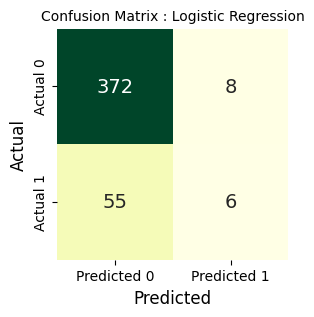

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_test are your true labels and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred_test_lg)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGn', cbar=False,
            annot_kws={"size": 14}, square=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix : Logistic Regression', fontsize=10)
plt.show()

### **Conclusion:**

Based on the above results, the SVM model has the highest accuracy, followed by the logistic regression model and the naive Bayes model. However, the SVM model has the lowest recall for class 1, which is important for this particular application.

The logistic regression model has a slightly lower accuracy than the SVM model, but it has a much higher recall for class 1. This means that the logistic regression model is better at predicting positive instances as positive, which is important for this application.

The naive Bayes model has the lowest accuracy of the three models. However, it has a higher recall for class 0 than the logistic regression model. This means that the naive Bayes model is better at predicting negative instances as negative, which can be important in some applications.

Overall, the logistic regression model is the best model for this application. It has a high accuracy and a high recall for class 1, which are both important for this application.

**ROC-AUC Curve:**

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# Support Vector Machine

svm_roc_auc = roc_auc_score(y_test, svm.predict(X_test_selected))
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test_selected)[:,1])


In [ ]:
# Naive Bayes :

nb_roc_auc = roc_auc_score(y_test, gnb.predict(X_test_selected))
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test_selected)[:,1])

In [ ]:
# Logistic Regression:

lg_roc_auc = roc_auc_score(y_test, lg_model.predict(X_test_selected))
lg_frp, lg_tpr, thresholds = roc_curve(y_test, lg_model.predict_proba(X_test_selected)[:,1])

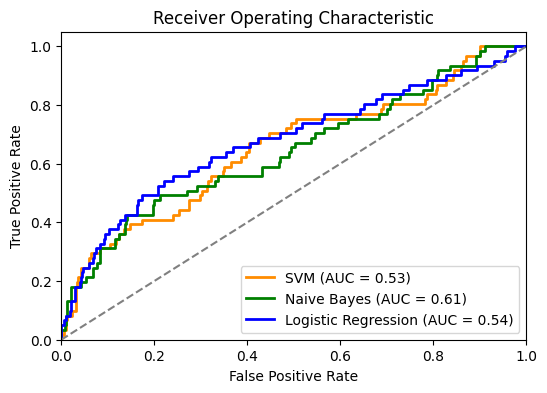

In [ ]:
# Plot AUC-ROC curves
plt.figure(figsize=(6, 4))

# SVM ROC curve
plt.plot(svm_fpr, svm_tpr, color='darkorange', lw=2, label='SVM (AUC = %0.2f)' % svm_roc_auc)

# Naive Bayes ROC curve
plt.plot(nb_fpr, nb_tpr, color='green', lw=2, label='Naive Bayes (AUC = %0.2f)' % nb_roc_auc)

# Logistic Regression ROC curve
plt.plot(lg_frp, lg_tpr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % lg_roc_auc)

# creating plot:
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

- From the above AUC-ROC Curve we can say that all the models are peforming well on an average, but Naive Bayes has the highest AUC score i.e 0.61